In [43]:
#!pip install vaderSentiment


In [1]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import numpy as np
import collections
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers


In [2]:
data1=pd.read_csv("Tweet.csv")
data2=pd.read_csv("Company_Tweet.csv")

In [3]:
data1

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [4]:
data2

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


# Performing EDA on Data

In [5]:
data1.shape

(3717964, 7)

In [6]:
len(data1['writer'].unique())

140132

In [7]:
data1.isnull().sum()

tweet_id           0
writer         47273
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64

In [8]:
data2.isnull().sum()

tweet_id         0
ticker_symbol    0
dtype: int64

In [9]:
tweets = pd.merge(data2, data1, on='tweet_id', how='inner')

In [10]:
tweets.shape

(4336445, 8)

In [11]:
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
...,...,...,...,...,...,...,...,...
4336440,1212158772015034369,TSLA,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0
4336441,1212159099632267268,TSLA,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0
4336442,1212159184931717120,TSLA,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0
4336443,1212159838882533376,TSLA,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1


In [12]:
tweets.isnull().sum()

tweet_id             0
ticker_symbol        0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
dtype: int64

In [13]:
data=tweets["body"]
df=pd.DataFrame(data)
df

,body
0,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
1,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
2,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
3,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
4,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
...,...
4336440,"I'm getting wasted on NYE, and thanks to @NHTS..."
4336441,$TSLA Very Interesting dude:
4336442,If only 2020 brought more self-awareness to Te...
4336443,In 2020 I may start Tweeting out positive news...


# Data Pre-Processing

In [14]:
stop_words = stopwords.words('english')
to_remove = ['against', 'between','into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below','from',
 'up',
 'down',
 'in',
 'out',
 'on','off',
 'over',
 'under','few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own','very']
stopwords = set(stopwords.words('english')).difference(to_remove)
stopwords=list(stopwords)

In [15]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [16]:
def preprocessing(x):
    x=x.lower()
    words = x.split()
    words = [expand_contractions(word) for word in words]
    translating = str.maketrans('', '', string.punctuation)
    x=' '.join(words)
    x = x.translate(translating)
    return x

In [17]:
def lemmatize_words(text):
    
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    words = [word for word in words if word not in stop_words]
    #removing all stop words is not useful
    return ' '.join(words)

In [18]:
def negativityCheck(sentence):
    if(analyzer.polarity_scores(sentence)["neg"]>0.7):
        return 1
    else:
        return 0

In [19]:
import string

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

df["body"]=df["body"].apply(preprocessing)
df['lemma'] = df['body'].apply(lemmatize_words)
df["negative"]=df["lemma"].apply(negativityCheck).tolist()

In [20]:
df[df["negative"]==1]

,body,lemma,negative
1119,there is that panic in aapl,panic aapl,1
3643,what the fuck aapl,fuck aapl,1
4967,aapl pathetic and weak,aapl pathetic weak,1
4969,aapl dump,aapl dump,1
5271,aapl dead cat died spy,aapl dead cat die spy,1
...,...,...,...
4333373,tsla killers that died before arrival,tsla killers die arrival,1
4334723,nah tsla goes up on fraud,nah tsla go fraud,1
4334729,tsla 410 the horror the horror,tsla 410 horror horror,1
4335935,tsla you are a crazy sob,tsla crazy sob,1


In [21]:
df[["ticker_symbol","comment_num", "retweet_num", "like_num"]]=tweets[['ticker_symbol',"comment_num", "retweet_num", "like_num"]]

In [22]:
df

,body,lemma,negative,ticker_symbol,comment_num,retweet_num,like_num
0,toptickertweets aapl imrs baba ebay amzn t ign...,toptickertweets aapl imrs baba ebay amzn ign s...,0,AAPL,0,0,1
1,toptickertweets aapl imrs baba ebay amzn t ign...,toptickertweets aapl imrs baba ebay amzn ign s...,0,AMZN,0,0,1
2,sentishiftup k fb googl gs gold t aapl baba tw...,sentishiftup k fb googl gs gold aapl baba twtr...,0,AAPL,0,0,1
3,sentishiftup k fb googl gs gold t aapl baba tw...,sentishiftup k fb googl gs gold aapl baba twtr...,0,GOOGL,0,0,1
4,sentishiftup k fb googl gs gold t aapl baba tw...,sentishiftup k fb googl gs gold aapl baba twtr...,0,AMZN,0,0,1
...,...,...,...,...,...,...,...
4336440,im getting wasted on nye and thanks to nhtsago...,im get waste nye thank nhtsagov approve tsla a...,0,TSLA,0,0,0
4336441,tsla very interesting dude,tsla interest dude,0,TSLA,0,0,0
4336442,if only 2020 brought more selfawareness to tes...,2020 bring selfawareness tesla autopilot assho...,0,TSLA,0,1,0
4336443,in 2020 i may start tweeting out positive news...,2020 may start tweet positive news xom cvx mce...,0,TSLA,0,0,1


In [23]:
df[df['negative']==1].groupby(['ticker_symbol'])["ticker_symbol"].count()

ticker_symbol
AAPL      704
AMZN      399
GOOG       58
GOOGL     157
MSFT       80
TSLA     1088
Name: ticker_symbol, dtype: int64

In [24]:
df[df['negative']==1].groupby(['ticker_symbol'])["ticker_symbol"].count().sum()  #negative sentences

2486

In [25]:
d1=df[df["negative"]==1]
# randomly choosing postive tweets for our dataset
d2=df[df["negative"]==0].sample(n = 2000, random_state = 2)

In [26]:
frames = [d1, d2]

data = pd.concat(frames)

In [27]:
data

,body,lemma,negative,ticker_symbol,comment_num,retweet_num,like_num
1119,there is that panic in aapl,panic aapl,1,AAPL,0,1,1
3643,what the fuck aapl,fuck aapl,1,AAPL,0,0,0
4967,aapl pathetic and weak,aapl pathetic weak,1,AAPL,0,0,0
4969,aapl dump,aapl dump,1,AAPL,0,0,0
5271,aapl dead cat died spy,aapl dead cat die spy,1,AAPL,1,0,0
...,...,...,...,...,...,...,...
110081,rt reuters applewatch not on shopping list fo...,rt reuters applewatch shop list 69 percent ame...,0,AAPL,0,1,0
2266303,lol mention googl in a tweet and start getting...,lol mention googl tweet start get add sort lis...,0,GOOGL,0,0,0
1364889,cityfalcon score gives top rated news for free...,cityfalcon score give top rat news free bigdat...,0,AAPL,0,0,0
4160005,rolled down to 2025s at 163 tsla,roll 2025s 163 tsla,0,TSLA,0,0,1


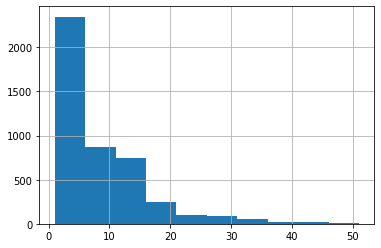

Mean: 7.9311
Std: 7.2590
Mean+3*Std = 29.7083
Max: 51.0000
Min: 1.0000


In [28]:
import matplotlib.pyplot as plt

lengths = data["lemma"].apply(lambda x : len(x.split(" "))) # mean + 3*sigma
lengths.hist()
plt.show()

mean = lengths.mean()
std = lengths.std()
maxn= max(lengths)
minn= min(lengths)
approx_nseq = mean + 3*std
print(f"Mean: {mean:.4f}\nStd: {std:.4f}\nMean+3*Std = {approx_nseq:.4f}\nMax: {maxn:.4f}\nMin: {minn:.4f}")


#Here we can find the average length of comments 
#Most of the sentence have a length of less than 10 
#Average length of each sentence is 12
#max length of sentence is 58 
#min length of sentence is 1

In [50]:
MAX_LEN=int(approx_nseq)
NB_WORDS=sum(lengths)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["lemma","ticker_symbol","comment_num","retweet_num","like_num"]], data["negative"],stratify=data["negative"], test_size=0.25,random_state=2)
X_train, X_test, y_train, y_test 

(                                                     lemma ticker_symbol  \
 2909584  amzn say middle finger trummmp dave alertajawe...          AMZN   
 3814419                                        stupid tsla          TSLA   
 2792923    invest amazon require 2020 vision vr world amzn          AMZN   
 4249540                 block httpstwittercompaul917017636          TSLA   
 4246841   tsla tesla desperately fight already lose battle          TSLA   
 ...                                                    ...           ...   
 2987831  day4 spy 921 amzn 1615c 1852 amzn 1560p 490 3 ...          AMZN   
 1004253                                   aapl crap low ah          AAPL   
 3219465  curt kolcun microsoft seek facilitate govt clo...          MSFT   
 3939250  tsla semi production suppose start 2019 see me...          TSLA   
 3045327                                 amzn lose get ugly          AMZN   
 
          comment_num  retweet_num  like_num  
 2909584            0      

In [31]:
tk = Tokenizer()
tk.fit_on_texts(X_train['lemma'])
X_train_seq = tk.texts_to_sequences(X_train['lemma'])
X_test_seq = tk.texts_to_sequences(X_test['lemma'])


In [32]:
X_train['lemma']

2909584    amzn say middle finger trummmp dave alertajawe...
3814419                                          stupid tsla
2792923      invest amazon require 2020 vision vr world amzn
4249540                   block httpstwittercompaul917017636
4246841     tsla tesla desperately fight already lose battle
                                 ...                        
2987831    day4 spy 921 amzn 1615c 1852 amzn 1560p 490 3 ...
1004253                                     aapl crap low ah
3219465    curt kolcun microsoft seek facilitate govt clo...
3939250    tsla semi production suppose start 2019 see me...
3045327                                   amzn lose get ugly
Name: lemma, Length: 3364, dtype: object

In [33]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [34]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [64]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

In [65]:
import tensorflow as tf
tf.autograph.set_verbosity(0)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger
log = CSVLogger('log.csv', append=True, separator=',')



model = Sequential()
model.add(Embedding(NB_WORDS, 3000, input_length=MAX_LEN))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(352, activation='LeakyReLU'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

#Model Training
history=model.fit(X_train_emb, y_train_emb,
          epochs = 5,
          batch_size=32,
          validation_data = (X_valid_emb, y_valid_emb), 
          callbacks=[log],
          verbose =1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 29, 3000)          106737000 
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 29, 3000)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 704)               10433280  
                                                                 
 dense_2 (Dense)             (None, 352)               248160    
                                                                 
 dense_3 (Dense)             (None, 2)                 706       
                                                                 
Total params: 117,419,146
Trainable params: 117,419,146
Non-trainable params: 0
________________________________________

In [67]:
model.evaluate(X_test_seq_trunc,y_test_oh)

36/36 [==============================] - 16s 452ms/step - loss: 0.0923 - accuracy: 0.9688


[0.09232339262962341, 0.968805730342865]

In [68]:
y_pred=model.predict(X_test_seq_trunc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [69]:
y_pred

array([[9.9990392e-01, 3.1653057e-05],
       [1.4522105e-02, 9.9250859e-01],
       [6.3108206e-03, 9.9761081e-01],
       ...,
       [9.5831907e-01, 2.5483042e-02],
       [3.6189377e-02, 9.7725940e-01],
       [9.9948156e-01, 2.1079183e-04]], dtype=float32)

In [71]:
model.save("company_model.h5")

In [106]:
from flask import Flask,request, render_template
import numpy as np
import keras


app=Flask(__name__)

model = keras.models.load_model("company_model.h5")

@app.route("/")
def home():
    return render_template("index.html")

@app.route('/predict',methods=["POST"])
def predict():
    text=request.form.get("company comment")
    
    
    text=preprocessing(text)
    text=expand_contractions(text)
    text=lemmatize_words(text)
    
    tk.fit_on_texts(X_train['lemma'])
    t = tk.texts_to_sequences([text])
    t=pad_sequences(t, maxlen=MAX_LEN)
    ans=model.predict(t)
    if ans[0][0]>ans[0][1]:
        output="Positive Sentiment"
    else:
        output="Negative sentiment"
        
    
    return render_template("index.html" , pred=output)

if __name__=="__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Apr/2023 19:01:06] "GET / HTTP/1.1" 200 -


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


127.0.0.1 - - [28/Apr/2023 19:01:20] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 19:01:44] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 19:02:16] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 19:02:28] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 19:03:00] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 19:03:19] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 19:03:36] "POST /predict HTTP/1.1" 200 -
